In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import product

In [4]:
# Step 1: Load Data
data_path = 'exchange_rate.csv'
df = pd.read_csv(data_path, parse_dates=['date'], index_col='date')

In [6]:
df.head()

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


In [8]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


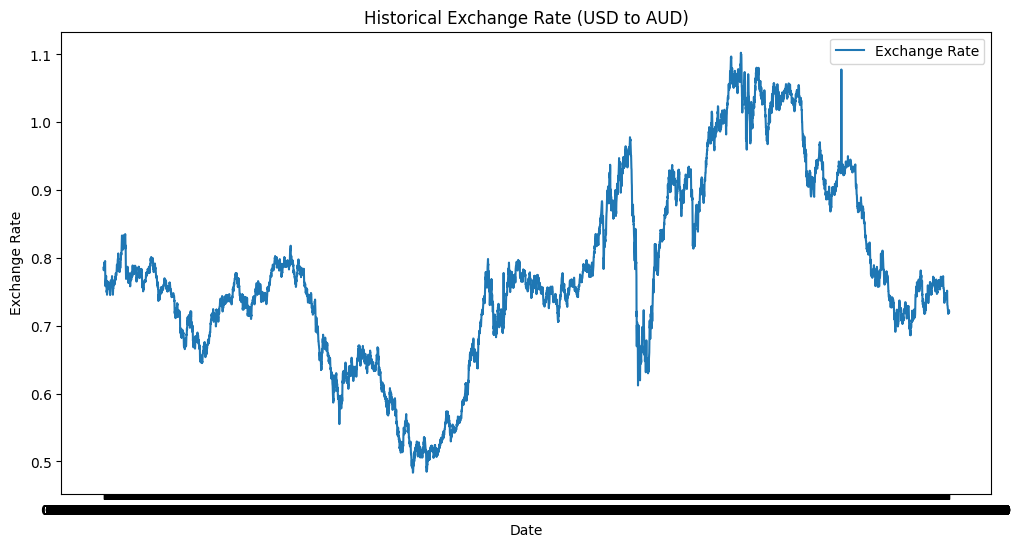

In [7]:
# Step 2: Initial Exploration
plt.figure(figsize=(12,6))
plt.plot(df, label='Exchange Rate')
plt.title('Historical Exchange Rate (USD to AUD)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [9]:
# Step 3: Handle Missing Values
df = df.interpolate()  # Fill missing values using interpolation

In [10]:
# Step 4: Check for Stationarity
result = adfuller(df.iloc[:, 0])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("The series is not stationary. Differencing needed.")
    df_diff = df.diff().dropna()
else:
    print("The series is stationary.")
    df_diff = df

ADF Statistic: -1.6649941807381528
p-value: 0.4492327353597901
The series is not stationary. Differencing needed.


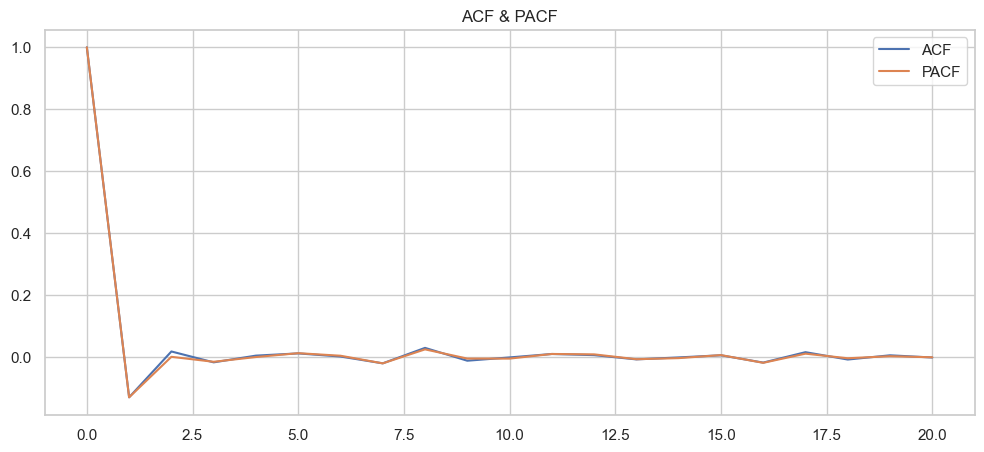

In [11]:
# Step 5: ACF and PACF Plots
plt.figure(figsize=(12,5))
sns.set(style="whitegrid")
sns.lineplot(data=acf(df_diff.dropna(), nlags=20), label='ACF')
sns.lineplot(data=pacf(df_diff.dropna(), nlags=20), label='PACF')
plt.legend()
plt.title("ACF & PACF")
plt.show()

In [12]:
# Step 6: Fit ARIMA Model
p, d, q = 1, 1, 1  # Based on ACF/PACF
model_arima = ARIMA(df, order=(p, d, q))
model_fit = model_arima.fit()
print(model_fit.summary())

d:\Selenium\webdriver\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\Selenium\webdriver\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\Selenium\webdriver\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Tue, 18 Mar 2025   AIC                         -56102.322
Time:                        22:07:15   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

d:\Selenium\webdriver\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Selenium\webdriver\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


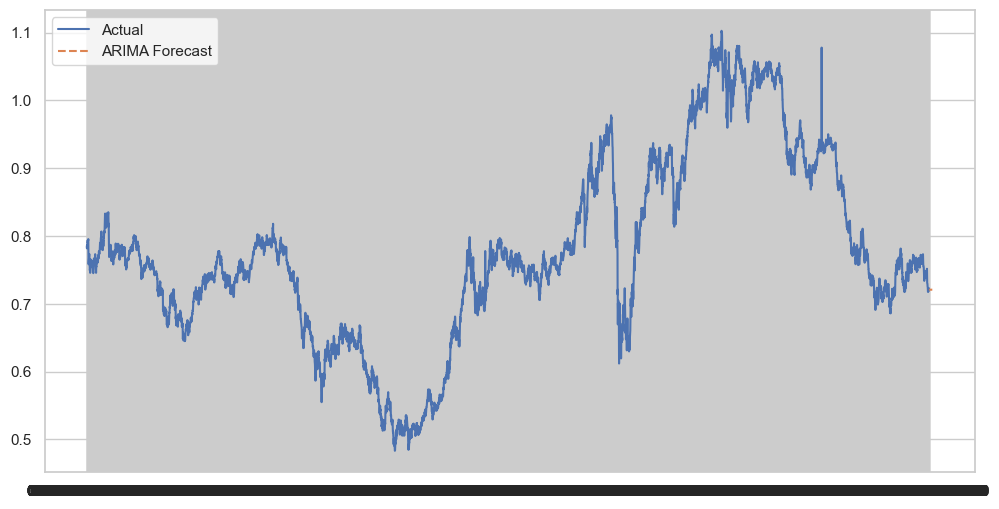

In [13]:
# Step 7: ARIMA Forecasting
forecast_arima = model_fit.forecast(steps=30)
plt.figure(figsize=(12,6))
plt.plot(df, label='Actual')
plt.plot(forecast_arima, label='ARIMA Forecast', linestyle='dashed')
plt.legend()
plt.show()

In [14]:
# Step 8: Exponential Smoothing Model Selection & Optimization
best_model = None
best_aic = float("inf")
best_params = None

for trend, seasonal in product([None, 'add', 'mul'], [None, 'add', 'mul']):
    try:
        model_es = ExponentialSmoothing(df, trend=trend, seasonal=seasonal, seasonal_periods=12).fit()
        aic = model_es.aic
        if aic < best_aic:
            best_aic = aic
            best_model = model_es
            best_params = (trend, seasonal)
    except:
        continue

print(f"Best Exponential Smoothing Model: Trend={best_params[0]}, Seasonal={best_params[1]}")

d:\Selenium\webdriver\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\Selenium\webdriver\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\Selenium\webdriver\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\Selenium\webdriver\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

Best Exponential Smoothing Model: Trend=None, Seasonal=None


In [15]:
# Step 9: Fit Best Exponential Smoothing Model
forecast_es = best_model.forecast(30)

d:\Selenium\webdriver\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Selenium\webdriver\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


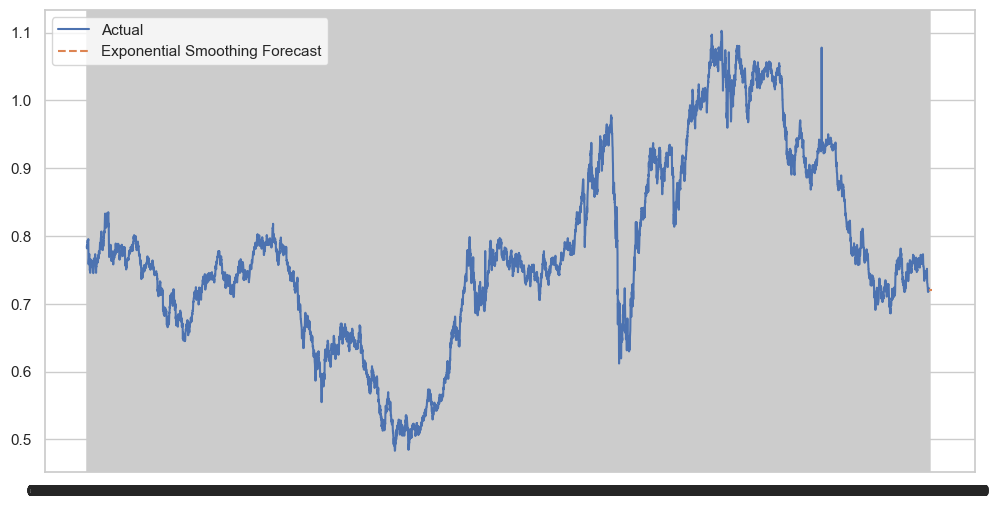

In [16]:
# Step 10: Exponential Smoothing Forecasting
plt.figure(figsize=(12,6))
plt.plot(df, label='Actual')
plt.plot(forecast_es, label='Exponential Smoothing Forecast', linestyle='dashed')
plt.legend()
plt.show()

In [17]:
# Step 11: Model Evaluation
y_true = df[-30:]
y_pred_arima = forecast_arima[:30]
y_pred_es = forecast_es[:30]

mae_arima = mean_absolute_error(y_true, y_pred_arima)
rmse_arima = np.sqrt(mean_squared_error(y_true, y_pred_arima))
mape_arima = np.mean(np.abs((y_true - y_pred_arima) / y_true)) * 100

mae_es = mean_absolute_error(y_true, y_pred_es)
rmse_es = np.sqrt(mean_squared_error(y_true, y_pred_es))
mape_es = np.mean(np.abs((y_true - y_pred_es) / y_true)) * 100

print("ARIMA - MAE:", mae_arima, "RMSE:", rmse_arima, "MAPE:", mape_arima)
print("Exponential Smoothing - MAE:", mae_es, "RMSE:", rmse_es, "MAPE:", mape_es)

ARIMA - MAE: 0.012724006489305202 RMSE: 0.016982710912755217 MAPE: nan
Exponential Smoothing - MAE: 0.012707429455384294 RMSE: 0.016957814302365717 MAPE: nan


In [18]:
# Step 12: Model Comparison and Conclusion
if mae_arima < mae_es and rmse_arima < rmse_es:
    print("ARIMA performed better based on error metrics.")
elif mae_es < mae_arima and rmse_es < rmse_arima:
    print("Exponential Smoothing performed better based on error metrics.")
else:
    print("Both models have similar performance.")

Exponential Smoothing performed better based on error metrics.
